# AEROSP 520 Compressible Flow: Homework 6
Jason Chen

## Problem 3
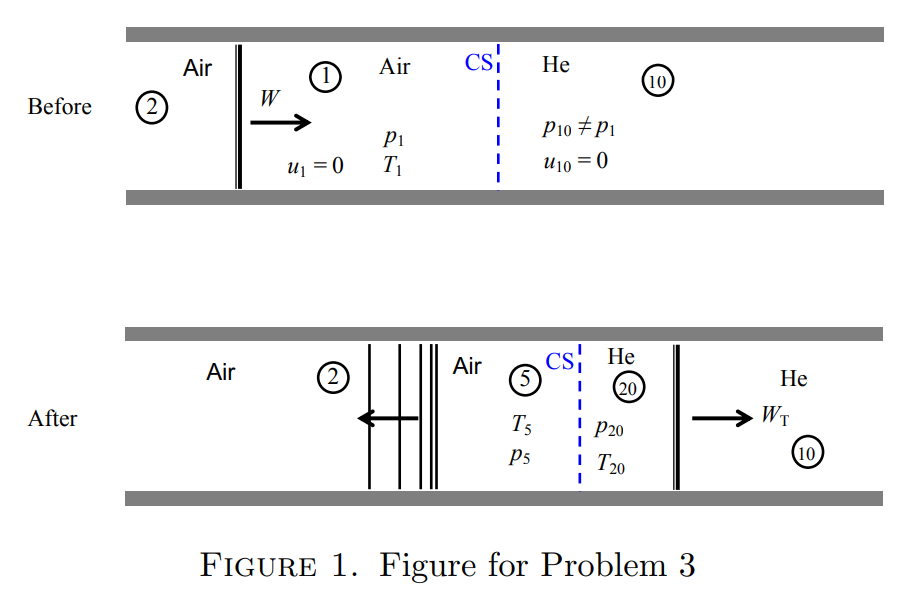

Assume region (1) contains air at $p_1 = 50 \textrm{ Torr}$ and $T_1 = 300 \textrm{ K}$, and region (1) contains helium at $p_{10} = 25 \textrm{ Torr}$ and $T_{10} = 300 \textrm{ K}$. The speed of the primary shock is initially $W = 1000 \textrm{ m/s}$.

### Part (a)
Prompt: *Indicate what are the conditions across the contact surface that define regions 5 and 20, and hence the final solution of the problem.*

As with any material discontinuity, the velocity magnitude and static pressure on either side of the boundary must be equal, or else there would be transport across the boundary. Thus:
$$
\boxed{u_5 = u_{20}, \textrm{ } p_5 = p_{20}}
$$

### Part (b)
Prompt: *Find the pressure, temperature and speed behind the secondary moving shock.*

We are interested in the properties at region 20, after $W_T$. However, since we do not know the properties of $W_T$, our solution strategy will be to solve for the LHS of the resultant contact surface (CS) to then solve for region 20. Since we know that region 5 is the result of firstly region 1 being shocked by the incident wave $W$ (resulting in region 2) and then expanded, we will initially solve for the properties of region 2. Since $W$ is a moving shock, we can shift our reference frame to that of the moving shock such that it is stationary, and it is as if there is a $1000 \textrm{ m/s}$ flow (of region 1) shocking and gaining static pressure and temperature as it transforms to region 2.

Thus, we can use the elementary shock jump relations to solve for region 2. The Mach number of the "flow" in region 1 is:
$$
M_1 = \frac{W}{a_1} = \frac{W}{\sqrt{\gamma R T_1}}
$$
This assumes a CPG, which is valid at these moderate temperatures and pressures. We will use $\gamma = 1.4$ and $R = 287 \textrm{ J/kg/K}$ for air. Then, we can find the static pressure jump in region 2:
$$
\frac{p_2}{p_1} = \frac{2\gamma M_1^2 - (\gamma-1)}{\gamma + 1}
$$
From the Rankine-Hugoniot relations (from mass, momentum, and energy conservation across a moving shock) for a CPG, we can also get the density and temperature ratios:
$$
\frac{\rho_2}{\rho_1}=\frac{p_2}{p_1}\frac{T_1}{T_2}=\frac{1+\frac{\gamma+1}{\gamma-1}\frac{p_2}{p_1}}{\frac{\gamma+1}{\gamma-1}+\frac{p_2}{p_1}}
$$
$$
\frac{T_2}{T_1}=\frac{p_2}{p_1}\left[\frac{\frac{\gamma+1}{\gamma-1}+\frac{p_2}{p_1}}{1+\frac{\gamma+1}{\gamma-1}\frac{p_2}{p_1}}\right]
$$
This allows us to then solve for the piston velocity $u_p$, i.e. the induced flow velocity in region 2 after the shock as passed:
$$
u_p = u_2 = W\left(1-\frac{\rho_1}{\rho_2}\right)=\frac{a_1}{\gamma}\left(\frac{p_2}{p_1}-1\right)\left[\frac{\frac{2\gamma}{\gamma+1}}{\frac{p_2}{p_1}+\frac{\gamma-1}{\gamma+1}}\right]^{1/2}
$$


In [7]:
import numpy as np
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity

# Given/known constants as quantities
p1 = Q_(50.0, 'torr')           # Static pressure in region 1
T1 = Q_(300.0, 'kelvin')        # Temperature in region 1
W = Q_(1000.0, 'meter/second')  # Primary shock speed
gamma = 1.4
R = Q_(287.0, 'J/kg/K')
a1 = np.sqrt(gamma * R * T1)
M1 = (W / a1).to_base_units().magnitude

# Pressure ratio across the moving shock
p2_over_p1 = (2 * gamma * M1**2 - (gamma - 1)) / (gamma + 1)
# Temperature ratio from Rankine-Hugoniot
ratio_term = (gamma + 1)/(gamma - 1)
T2_over_T1 = p2_over_p1 * ((ratio_term + p2_over_p1)/(1 + ratio_term * p2_over_p1))
# Density ratio using p/(rho T)
rho2_over_rho1 = p2_over_p1/T2_over_T1

# Piston/induced flow velocity (region 2) from two equivalent forms
u_p = (W * (1 - 1/rho2_over_rho1))
u_p_closed = a1 * (2 / (gamma + 1)) * ((M1**2 - 1) / M1)

print(f"a1: {a1.m_as('m/s'):.3f} m/s")
print(f"M1: {M1:.3f}")
print(f"p2/p1: {p2_over_p1:.3f}")
print(f"T2/T1: {T2_over_T1:.3f}")
print(f"rho2/rho1: {rho2_over_rho1:.3f}")
print(f"u_p: {u_p.m_as('m/s'):.1f} m/s")
print(f"u_p (check): {u_p_closed.m_as('m/s'):.1f} m/s")

a1: 347.189 m/s
M1: 2.880
p2/p1: 9.512
T2/T1: 2.541
rho2/rho1: 3.744
u_p: 732.9 m/s
u_p (check): 732.9 m/s


Now, we want to solve for the post-EW state (region 5) using the properties we just found for region 2. We can analyze this problem by treating the EWs as a left-running expansion wave, and since the Riemann invariant $J^+$ is constant across such a wave, assuming a CPG we know:
$$
u_2 + \frac{2a_2}{\gamma-1} = u_5 + \frac{2a_5}{\gamma-1}
$$
We can then invoke the isentropic relations. We can do this because isentropic relations are a purely thermodynamic relation between two states, and additionally everything we've done so far is for an isentropic process (in this case, we're dealing with an expansion wave and dervied the characteristics given $\frac{D s}{Dt} = 0$). So:
$$
\frac{p_5}{p_2} = \left(\frac{T_5}{T_2}\right)^{\gamma/(\gamma-1)}
$$
And since $a^2 = \gamma R T$ for a CPG:
$$
\left(\frac{T_5}{T_2}\right) = \left(\frac{a_5^2}{a_2^2}\right) = \left(\frac{a_5}{a_2}\right)^2
$$
$$
\frac{p_5}{p_2} = \left(\frac{a_5}{a_2}\right)^{2\gamma/(\gamma-1)}
$$
Combining the Riemann equation and the above equation, we can parametrize $u_5$ and $p_5$ by the local speed of sound $a_5$:
$$
u_5 = u_2 + \frac{2}{\gamma - 1}(a_2 - a_5)
$$
$$
p_5 = p_2 \left(\frac{a_5}{a_2}\right)^{\frac{2\gamma}{\gamma-1}}
$$
This means that given $a_5$, we will be able to find all the other properties of state 5. But to do so, we need more information (more equations). This information will come from the $u_5 = u_{20}, \textrm{ } p_5 = p_{20}$ boundary condition we found in Part (a). We simply need to repeat the process for the unknown shock $W_T$, but since we do not know its speed, we need to express its equations and solve simultaneously as a system of equations with the equations for region 2 and 5 above:
$$
M_{10} = \frac{W_T}{\sqrt{\gamma_{10} R_{10} T_{10}}}
$$
$$
u_{20} = \frac{a_{10}}{\gamma_{10}}\left(\frac{p_{20}}{p_{10}}-1\right)\left[\frac{\frac{2\gamma_{10}}{\gamma_{10}+1}}{\frac{p_{20}}{p_{10}}+\frac{\gamma_{10}-1}{\gamma_{10}+1}}\right]^{1/2}
$$
$$
\frac{p_{20}}{p_{10}} = \frac{2\gamma_{10} M_{10}^2 - (\gamma_{10}-1)}{\gamma_{10} + 1}
$$

Invoking the boundary condition:
$$
p_{20} = p_{10}\frac{2\gamma_{10} M_{10}^2 - (\gamma_{10}-1)}{\gamma_{10} + 1} = p_5 = p_2 \left(\frac{a_5}{a_2}\right)^{\frac{2\gamma_1}{\gamma_1-1}}
$$
$$
u_{20} = \frac{a_{10}}{\gamma_{10}}\left(\frac{p_{20}}{p_{10}}-1\right)\left[\frac{\frac{2\gamma_{10}}{\gamma_{10}+1}}{\frac{p_{20}}{p_{10}}+\frac{\gamma_{10}-1}{\gamma_{10}+1}}\right]^{1/2} = u_5 = u_2 + \frac{2}{\gamma_1 - 1}(a_2 - a_5)
$$
The unknowns in the equation above are $W_T$ and $a_5$, with everything else known through substitution. There are 2 equations and 2 unknowns, so solving numerically:

In [8]:
from scipy.optimize import fsolve

# Helium properties
gamma_10 = 5/3
R_10 = Q_(2077.0, 'J/kg/K')
p_10 = Q_(25.0, 'torr')
T_10 = Q_(300.0, 'kelvin')

p2 = p1 * p2_over_p1
T2 = T1 * T2_over_T1
a2 = np.sqrt(gamma * R * T2)
u2 = u_p
a_10 = np.sqrt(gamma_10 * R_10 * T_10)
gamma_1 = 1.4

# Extract magnitudes for computation (avoiding Pint complexity in solver)
a_10_mag = a_10.m_as('m/s')
a2_mag = a2.m_as('m/s')
u2_mag = u2.m_as('m/s')
p2_mag = p2.m_as('Pa')
p_10_mag = p_10.m_as('Pa')

# Define the system of equations, unknowns: [W_T, a_5] in SI base units (m/s)
def equations(vars):
    W_T_val, a5_val = vars  # Both in m/s
    # Calculate M_10
    M_10 = W_T_val / a_10_mag
    # Calculate p_20/p_10
    p20_over_p10 = (2*gamma_10*M_10**2 - (gamma_10-1)) / (gamma_10 + 1)
    # Calculate p_20 from helium side (in Pa)
    p_20_helium = p_10_mag * p20_over_p10
    # Calculate p_5 from air side (in Pa)
    a5_over_a2 = a5_val / a2_mag
    p_5_air = p2_mag * (a5_over_a2)**(2*gamma_1/(gamma_1-1))
    # Calculate u_20 from helium side (in m/s)
    u_20_helium = (a_10_mag/gamma_10) * (p20_over_p10 - 1) * np.sqrt(
        (2*gamma_10/(gamma_10+1)) / (p20_over_p10 + (gamma_10-1)/(gamma_10+1))
    )
    # Calculate u_5 from air side (in m/s)
    u_5_air = u2_mag + (2/(gamma_1-1)) * (a2_mag - a5_val)
    # Equations (pressure and velocity continuity at contact surface)
    eq1 = p_20_helium - p_5_air  # Pa
    eq2 = u_20_helium - u_5_air  # m/s
    return [eq1, eq2]

# Solve the system
initial_guess = [500, 300]
solution = fsolve(equations, initial_guess)
W_T_solution = Q_(solution[0], 'm/s')
a5_solution = Q_(solution[1], 'm/s')

# Calculate final properties in region 20
M_10_final = (W_T_solution / a_10).to_base_units().magnitude
p20_over_p10_final = (2*gamma_10*M_10_final**2 - (gamma_10-1)) / (gamma_10 + 1)
p_20 = p_10 * p20_over_p10_final
u_20 = (a_10/gamma_10) * (p20_over_p10_final - 1) * np.sqrt(
    (2*gamma_10/(gamma_10+1)) / (p20_over_p10_final + (gamma_10-1)/(gamma_10+1))
)
ratio_term_10 = (gamma_10 + 1)/(gamma_10 - 1)
T20_over_T10 = p20_over_p10_final * ((ratio_term_10 + p20_over_p10_final)/(1 + ratio_term_10 * p20_over_p10_final))
T_20 = T_10 * T20_over_T10

print("\nSolution:")
print(f"W_T (transmitted shock speed): {W_T_solution.m_as('m/s'):.2f} m/s")
print(f"a_5 (sound speed in region 5): {a5_solution.m_as('m/s'):.2f} m/s")
print(f"\nRegion 20 properties:")
print(f"p_20: {p_20.to('torr'):.2f}")
print(f"u_20: {u_20.m_as('m/s'):.2f} m/s")
print(f"T_20: {T_20.m_as('kelvin'):.2f} K")


Solution:
W_T (transmitted shock speed): 2104.68 m/s
a_5 (sound speed in region 5): 458.30 m/s

Region 20 properties:
p_20: 127.05 torr
u_20: 1208.44 m/s
T_20: 649.20 K


### Part (c)
Prompt: *Find the pressure, temperature and speed in the expanded gas (region 5).*

We just need to find temperature $T_5$ from isentropic relations after the EW since $u_5 = u_{20}, \textrm{ } p_5 = p_{20}$.
$$
T_5 = T_2\left(\frac{p_5}{p_2}\right)^{(\gamma_1-1/\gamma_1)}
$$

In [9]:
T_5 = T2 * (p_20/p2)**((gamma_1 - 1)/gamma_1)
print(f"T_5: {T_5.m_as('kelvin'):.2f} K")

T_5: 522.76 K


$$
\boxed{u_5 = 1208.44 \textrm{ m/s} \textrm{,  } p_5 = 127.05 \textrm{ Torr} \textrm{,  } T_5 = 522.76 \textrm{ K}}
$$

### Part (d)
Prompt: *Find the pressure, temperature and speed distributions along the tube at one instant in time (you choose the instant in time). In other words, you need to generate a plot of $p(x)$, $T(x)$, $u(x)$ along the tube across regions 2, 5, 20 and 10 at a given time t.*

We can solve this by dividing the problem into distinct regions, as mentioned in the prompt. Region 2 is uniform and fully defined, and is separated from region 5 through an expansion wave. The expansion wave can be described as a set of simple (centered) characteristics, emanating from the origin. The leading characteristic (the "head") will be at location $x_{\textrm{head}} = (u_2 - a_2) t$ since by definition, a simple left-running $C^-$ characteristic has the slope:
$$
\frac{dt}{dx} = \frac{1}{u-a}
$$
on the x-t diagram. Thus the tail will have the location $x_{\textrm{tail}} = (u_5 - a_5) t$. The contact surface, due to the nonpenetration boundary condition, will have a location of $x_{CS} = u_5 t = u_{20} t$. The transmitted shock will have location $x_{\textrm{shock}} = W_T t$.

In Part (c) we derived the state variables at every region, so the only unsolved region is what happens between the head and tail of the expansion fans. For this, we once again invoke the $J^+$ Riemann invariant which is constant across these $C^-$ characteristics. We use the similarity variable $\xi$, which is the basis for using characteristics (it allows us to simplify a system of PDEs into ODEs):
$$
\xi = \frac{x}{t}
$$
Once again looking at our problem as solving for a horizontal line on the x-t diagram, we can see that for a given $t$ we can vary along $x$ the variable $\xi$ and solve directly for the state properties. So say we're on a $C^-$ line with inverse slope $\xi$:
$$
u - a = \xi
$$
Substituting into the $J^+$ equation:
$$
u + \frac{2a}{\gamma-1} = u_2 + \frac{2a_2}{\gamma-1} = (\xi + a) + \frac{2a}{\gamma-1}
$$
Simplifying we get:
$$
a(\xi) = \frac{2}{\gamma_1 + 1}\left(a_2 + \frac{\gamma_1 - 1}{2}(u_2 - \xi)\right)
$$
And the remaining state variables can be found through isentropic relations:
$$
T(\xi) = T_2 \left(\frac{a(\xi)}{a_2}\right)^2
$$
$$
p(\xi) = p_2 \left(\frac{a(\xi)}{a_2}\right)^{\frac{2\gamma_1}{\gamma_1-1}}
$$

Time: 50.0 μs
Expansion head: 8.973 mm
Expansion tail: 37.507 mm
Contact surface: 60.422 mm
Transmitted shock: 105.234 mm


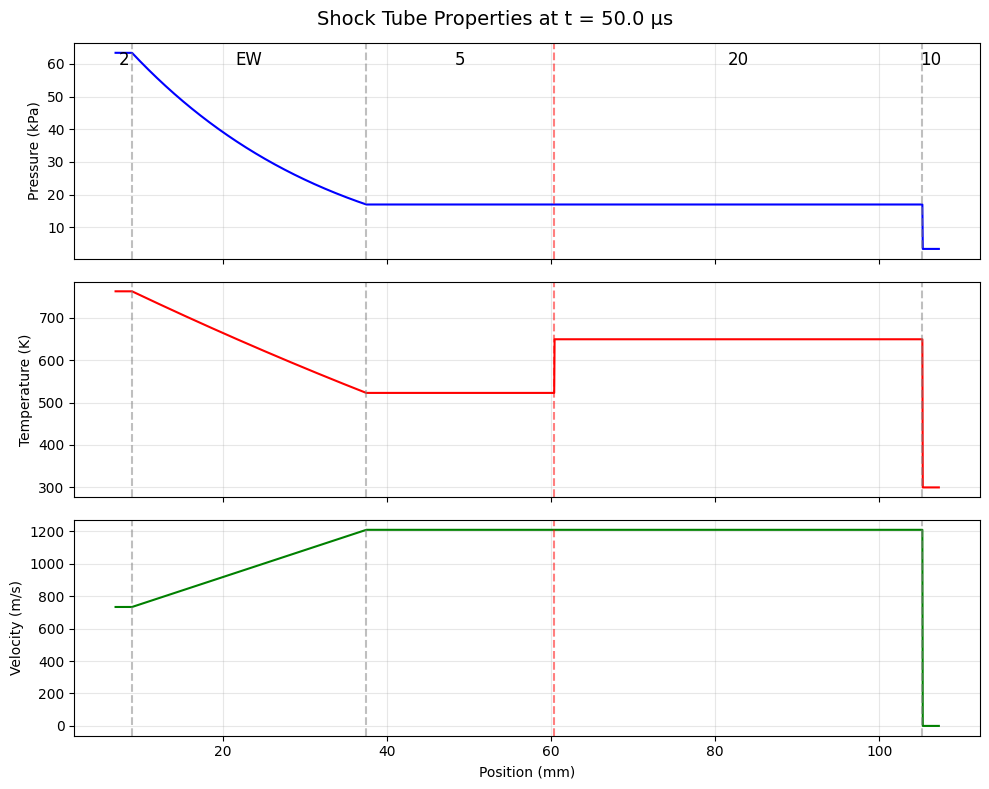

In [10]:
import matplotlib.pyplot as plt

# Extract magnitudes for plotting (all in SI units)
p2_mag = p2.m_as('Pa')
T2_mag = T2.m_as('K')
u2_mag = u2.m_as('m/s')
a2_mag = a2.m_as('m/s')
p5_mag = p_20.m_as('Pa')
T5_mag = T_5.m_as('K')
a5_mag = a5_solution.m_as('m/s')
u5_mag = u_20.m_as('m/s')
p20_mag = p_20.m_as('Pa')
T20_mag = T_20.m_as('K')
u20_mag = u_20.m_as('m/s')
p10_mag = p_10.m_as('Pa')
T10_mag = T_10.m_as('K')
u10_mag = 0.0
W_T_mag = W_T_solution.m_as('m/s')


t = 50e-6  # 50 microseconds
# Calculate wave positions at time t
x_head = (u2_mag - a2_mag) * t   # Expansion head (leftmost, negative since u2 < a2)
x_tail = (u5_mag - a5_mag) * t   # Expansion tail
x_CS = u5_mag * t                 # Contact surface
x_shock = W_T_mag * t             # Transmitted shock front

print(f"Time: {t*1e6:.1f} μs")
print(f"Expansion head: {x_head*1e3:.3f} mm")
print(f"Expansion tail: {x_tail*1e3:.3f} mm")
print(f"Contact surface: {x_CS*1e3:.3f} mm")
print(f"Transmitted shock: {x_shock*1e3:.3f} mm")

# Create x array with some margin on each side
margin = 0.002  # 2 mm margin
x = np.linspace(x_head - margin, x_shock + margin, 2000)
p = np.zeros_like(x)
T = np.zeros_like(x)
u = np.zeros_like(x)

# Fill in properties based on region
for i, xi in enumerate(x):
    if xi < x_head:
        # Region 2 (uniform, behind expansion)
        p[i] = p2_mag
        T[i] = T2_mag
        u[i] = u2_mag
    elif xi < x_tail:
        # Expansion fan - use similarity solution
        xi_t = xi / t  # similarity variable
        a_local = (2 / (gamma + 1)) * (a2_mag + (gamma - 1) / 2 * (u2_mag - xi_t))
        u[i] = xi_t + a_local
        T[i] = T2_mag * (a_local / a2_mag)**2
        p[i] = p2_mag * (a_local / a2_mag)**(2 * gamma / (gamma - 1))
    elif xi < x_CS:
        # Region 5 (expanded air)
        p[i] = p5_mag
        T[i] = T5_mag
        u[i] = u5_mag
    elif xi < x_shock:
        # Region 20 (shocked helium)
        p[i] = p20_mag
        T[i] = T20_mag
        u[i] = u20_mag
    else:
        # Region 10 (undisturbed helium)
        p[i] = p10_mag
        T[i] = T10_mag
        u[i] = u10_mag

# Convert x to mm for plotting
x_mm = x * 1e3
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Pressure plot
axes[0].plot(x_mm, p / 1e3, 'b-', linewidth=1.5)
axes[0].set_ylabel('Pressure (kPa)')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(x_head*1e3, color='gray', linestyle='--', alpha=0.5, label='Wave boundaries')
axes[0].axvline(x_tail*1e3, color='gray', linestyle='--', alpha=0.5)
axes[0].axvline(x_CS*1e3, color='red', linestyle='--', alpha=0.5, label='Contact surface')
axes[0].axvline(x_shock*1e3, color='gray', linestyle='--', alpha=0.5)

# Temperature plot
axes[1].plot(x_mm, T, 'r-', linewidth=1.5)
axes[1].set_ylabel('Temperature (K)')
axes[1].grid(True, alpha=0.3)
axes[1].axvline(x_head*1e3, color='gray', linestyle='--', alpha=0.5)
axes[1].axvline(x_tail*1e3, color='gray', linestyle='--', alpha=0.5)
axes[1].axvline(x_CS*1e3, color='red', linestyle='--', alpha=0.5)
axes[1].axvline(x_shock*1e3, color='gray', linestyle='--', alpha=0.5)

# Velocity plot
axes[2].plot(x_mm, u, 'g-', linewidth=1.5)
axes[2].set_ylabel('Velocity (m/s)')
axes[2].set_xlabel('Position (mm)')
axes[2].grid(True, alpha=0.3)
axes[2].axvline(x_head*1e3, color='gray', linestyle='--', alpha=0.5)
axes[2].axvline(x_tail*1e3, color='gray', linestyle='--', alpha=0.5)
axes[2].axvline(x_CS*1e3, color='red', linestyle='--', alpha=0.5)
axes[2].axvline(x_shock*1e3, color='gray', linestyle='--', alpha=0.5)

# Add region labels to top plot
y_label = axes[0].get_ylim()[1] * 0.9
axes[0].text((x_head*1e3 - margin*1e3/2), y_label, '2', ha='center', fontsize=12)
axes[0].text((x_head*1e3 + x_tail*1e3)/2, y_label, 'EW', ha='center', fontsize=12)
axes[0].text((x_tail*1e3 + x_CS*1e3)/2, y_label, '5', ha='center', fontsize=12)
axes[0].text((x_CS*1e3 + x_shock*1e3)/2, y_label, '20', ha='center', fontsize=12)
axes[0].text((x_shock*1e3 + x_shock*1e3 + margin*1e3)/2, y_label, '10', ha='center', fontsize=12)

fig.suptitle(f'Shock Tube Properties at t = {t*1e6:.1f} μs', fontsize=14)
plt.tight_layout()
plt.show()